      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
RMSE: 0.8865961703451438
R2 Score: 0.45592991188724463
Cross-Validation Scores: [ -3.23415827  -7.6

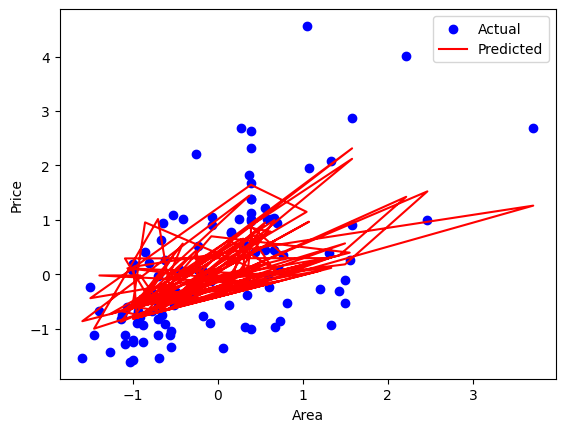

Параметри моделі (ваги): [0.40082084 0.14213176 0.38208794]
Аналітично знайдені ваги: [0.40082084 0.14213176 0.38208794]


In [2]:
# Імпорт бібліотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Крок 1: Завантаження даних та виведення перших 5 рядків
data = pd.read_csv('./Housing.csv')
print(data.head())

# Крок 2: Створення нового датасету з вибраними стовпчиками
columns = ['price', 'area', 'bedrooms', 'bathrooms']
data = data[columns]

# Крок 3: Попередній аналіз та нормалізація даних
# Перевірка на наявність "-" та заміна на NaN
data = data.replace('-', np.nan)
# Зміна типу даних на float
data = data.astype(float)
# Заміна NaN середнім значенням по стовпчику
data = data.fillna(data.mean())

# Нормалізація даних
data = (data - data.mean()) / data.std()

# Крок 4: Розділення даних на навчальний та тестовий набори
X = data[['area', 'bedrooms', 'bathrooms']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Крок 5: Побудова та навчання моделі лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Крок 6: Оцінка якості моделі на тестових даних
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Крок 7: Крос-валідація для підвищення якості моделі
cross_val_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-Validation Scores: {cross_val_scores}')

# Частина 2: Знайдення параметрів аналітичним рішенням
# Параметри моделі - ваги
weights = model.coef_
intercept = model.intercept_
print(f'Аналітично знайдені ваги: {weights}')
print(f'Аналітично знайдений інтерсепт: {intercept}')

# Частина 3: Візуалізація результатів та порівняння
# Візуалізація даних та регресії для одного з атрибутів (наприклад, площа)
plt.scatter(X_test['area'], y_test, color='b', label='Actual')
plt.plot(X_test['area'], y_pred, color='r', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

# Порівняння параметрів лінійної регресії з аналітичними результатами
print(f'Параметри моделі (ваги): {model.coef_}')
print(f'Аналітично знайдені ваги: {weights}')

# Висновки
# Висновки та оцінка ефективності лінійної регресії слід робити на основі оцінок RMSE, R2 та порівняння параметрів моделі.
